# Kaggle courses

# Lesson: Data Visualization: From Non-Coder to Coder!


First of all upload the dataset "security-log.csv"



In [0]:
# Set up the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [0]:
# Path of the file to read
sec_filepath = "/content/20190711_security-log.csv"
# header=none: insert the index at the top of the matrix
df = pd.read_csv(sec_filepath, sep=';', header=None)

In [0]:
def cut_string(x, char, pos=0):
    if type(x) == str:
        return x.split(char)[pos]
    else:
        return x

In [0]:


# lambda: funtion in line
#df.columns = [df[col].apply(lambda x: cut_string(x, char='=', pos=0)).dropna().unique()[0] for col in df.columns]

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,itime=1562794099,date=2019-07-10,time=23:28:18,devid=FWF40C3915001580,vd=root,type=utm,subtype=app-ctrl,action=pass,app=SSL_TLSv1.2,appcat=Network.Service,appid=41540,applist=default,apprisk=medium,NaN,NaN,dstintf=wifi,dstip=17.248.146.168,NaN,dstport=443,eventtype=app-ctrl-all,hostname=gateway.icloud.com,level=information,logid=28704,logver=52,"msg=""Network.Service: SSL_TLSv1.2,""",policyid=3,proto=6,service=HTTPS,sessionid=165147,srcintf=wan1,srcip=192.168.52.2,srcport=60599,url=/
1,itime=1562794099,date=2019-07-10,time=23:28:18,devid=FWF40C3915001580,vd=root,type=utm,subtype=app-ctrl,action=pass,app=SSL,appcat=Network.Service,appid=15895,applist=default,apprisk=elevated,NaN,NaN,dstintf=wan1,dstip=17.248.146.168,NaN,dstport=443,eventtype=app-ctrl-all,hostname=gateway.icloud.com,level=information,logid=28704,logver=52,"msg=""Network.Service: SSL,""",policyid=3,proto=6,service=HTTPS,sessionid=165147,srcintf=wifi,srcip=192.168.52.2,srcport=60599,url=/
2,itime=1562793794,date=2019-07-10,time=23:23:15,devid=FWF40C3915001580,vd=root,type=utm,subtype=app-ctrl,action=pass,app=NTP,appcat=Network.Service,appid=16270,applist=default,apprisk=elevated,NaN,NaN,dstintf=wan1,dstip=17.253.54.125,NaN,dstport=123,eventtype=app-ctrl-all,NaN,level=information,logid=28704,logver=52,"msg=""Network.Service: NTP,""",policyid=3,proto=17,service=NTP,sessionid=164878,srcintf=wifi,srcip=192.168.52.2,srcport=55484,NaN
3,itime=1562793673,date=2019-07-10,time=23:21:15,devid=FWF40C3915001580,vd=root,type=utm,subtype=app-ctrl,action=pass,app=iCloud,appcat=Storage.Backup,appid=29880,applist=default,apprisk=medium,NaN,NaN,dstintf=wifi,dstip=17.248.146.168,NaN,dstport=443,eventtype=app-ctrl-all,hostname=gateway.icloud.com,level=information,logid=28704,logver=52,"msg=""Storage.Backup: iCloud,""",policyid=3,proto=6,service=HTTPS,sessionid=164786,srcintf=wan1,srcip=192.168.52.2,srcport=60598,url=/
4,itime=1562793673,date=2019-07-10,time=23:21:15,devid=FWF40C3915001580,vd=root,type=utm,subtype=app-ctrl,action=pass,app=SSL_TLSv1.2,appcat=Network.Service,appid=41540,applist=default,apprisk=medium,NaN,NaN,dstintf=wifi,dstip=17.248.146.168,NaN,dstport=443,eventtype=app-ctrl-all,hostname=gateway.icloud.com,level=information,logid=28704,logver=52,"msg=""Network.Service: SSL_TLSv1.2,""",policyid=3,proto=6,service=HTTPS,sessionid=164786,srcintf=wan1,srcip=192.168.52.2,srcport=60598,url=/


In [0]:
columns=[]
#columns=list()
for col in df.columns:
  print(col)
#  print(df.index)
#  print(df.loc[:10].index)
  series=df[col].copy()
#  series=df.loc[:10,col].copy()
#  print(series)
  for row in df.index:
#  for row in df.loc[:10].index:
#    print(row)
    series[row]=cut_string(df.loc[row,col],'=',0)
  series.dropna(inplace=True)
  list_cols=series.unique()
  print(list_cols)
  if len(list_cols) > 0:
    columns.append(list_cols[0])
  else:
    columns.append(f'hidden_{col}')
print(columns)
df.colums=columns

0
['itime']
1
['date']
2
['time']
3
['devid']
4
['vd']
5
['type']
6
['subtype']
7
['action']
8
['app']
9
['appcat']
10
['appid']
11
['applist']
12
['apprisk']
13
['crlevel']
14
['crscore']
15
['dstintf']
16
['dstip']
17
['dstname']
18
['dstport']
19
['eventtype']
20
['hostname']
21
['level']
22
['logid']
23
['logver']
24
['msg']
25
['policyid']
26
['proto']
27
['service']
28
['sessionid']
29
['srcintf']
30
['srcip']
31
['srcport']
32
['url']
['itime', 'date', 'time', 'devid', 'vd', 'type', 'subtype', 'action', 'app', 'appcat', 'appid', 'applist', 'apprisk', 'crlevel', 'crscore', 'dstintf', 'dstip', 'dstname', 'dstport', 'eventtype', 'hostname', 'level', 'logid', 'logver', 'msg', 'policyid', 'proto', 'service', 'sessionid', 'srcintf', 'srcip', 'srcport', 'url']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [0]:
df.columns=columns
df = df.applymap(lambda x: cut_string(x, char='=', pos=1))

#exercise: detail the last instruction

In [0]:
df.tail()

,itime,date,time,devid,vd,type,subtype,action,app,appcat,appid,applist,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,eventtype,hostname,level,logid,logver,msg,policyid,proto,service,sessionid,srcintf,srcip,srcport,url
4380,1562696065,2019-07-09,20:14:25,FWF40C3915001580,root,utm,app-ctrl,pass,SSL,Network.Service,15895,default,elevated,NaN,NaN,wan1,79.7.90.141,NaN,443,app-ctrl-all,zenetto.readynet.it,information,28704,52,"""Network.Service: SSL,""",5,6,HTTPS,124952,wifi-vodafone,192.168.53.2,49675,/
4381,1562696063,2019-07-09,20:14:23,FWF40C3915001580,root,utm,app-ctrl,pass,SSL_TLSv1.2,Network.Service,41540,default,medium,NaN,NaN,wifi-vodafone,79.7.90.141,NaN,443,app-ctrl-all,zenetto.readynet.it,information,28704,52,"""Network.Service: SSL_TLSv1.2,""",5,6,HTTPS,124949,wan1,192.168.53.2,49674,/
4382,1562696063,2019-07-09,20:14:23,FWF40C3915001580,root,utm,app-ctrl,pass,SSL,Network.Service,15895,default,elevated,NaN,NaN,wan1,79.7.90.141,NaN,443,app-ctrl-all,zenetto.readynet.it,information,28704,52,"""Network.Service: SSL,""",5,6,HTTPS,124949,wifi-vodafone,192.168.53.2,49674,/
4383,1562696063,2019-07-09,20:14:23,FWF40C3915001580,root,utm,app-ctrl,pass,IMAPS,Email,27783,default,medium,NaN,NaN,wifi-vodafone,93.57.20.183,NaN,993,app-ctrl-all,imaps.readynet.it,information,28704,52,"""Email: IMAPS,""",5,6,IMAPS,124948,wan1,192.168.53.2,53166,/
4384,1562696063,2019-07-09,20:14:23,FWF40C3915001580,r,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data elaboration


0. data cleaning; for example: the first cleaning should be on the unreachable or incorrect hostname 
1. select the most interesting colums
2. for each column indentify if there is an interesting graph to plot 
3. group the values of each of these columns to obtain a classification to plot (for example the most common source IP, especially from the pubblic net)
4. identifying relationships among the original columns or the columns classificated
5. identifying not accessible url parsing the output of the http call
6. identifying the meaning of the accessible urls
7. thinking to a first neural network application
8. other ideas





data cleaning; for example: the first cleaning should be on the unreachable or incorrect hostname

for each column indentify if there is an interesting graph to plot

group the values of each of these columns to obtain a classification to plot (for example the most common source IP, especially from the pubblic net)

identifying relationships among the original columns or the columns classificated

identifying not accessible url parsing the output of the http call

identifying the meaning of the accessible urls

thinking to a first neural network application

other ideas

In [0]:
df.head()

,itime,date,time,devid,vd,type,subtype,action,app,appcat,appid,applist,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,eventtype,hostname,level,logid,logver,msg,policyid,proto,service,sessionid,srcintf,srcip,srcport,url
0,1562794099,2019-07-10,23:28:18,FWF40C3915001580,root,utm,app-ctrl,pass,SSL_TLSv1.2,Network.Service,41540,default,medium,NaN,NaN,wifi,17.248.146.168,NaN,443,app-ctrl-all,gateway.icloud.com,information,28704,52,"""Network.Service: SSL_TLSv1.2,""",3,6,HTTPS,165147,wan1,192.168.52.2,60599,/
1,1562794099,2019-07-10,23:28:18,FWF40C3915001580,root,utm,app-ctrl,pass,SSL,Network.Service,15895,default,elevated,NaN,NaN,wan1,17.248.146.168,NaN,443,app-ctrl-all,gateway.icloud.com,information,28704,52,"""Network.Service: SSL,""",3,6,HTTPS,165147,wifi,192.168.52.2,60599,/
2,1562793794,2019-07-10,23:23:15,FWF40C3915001580,root,utm,app-ctrl,pass,NTP,Network.Service,16270,default,elevated,NaN,NaN,wan1,17.253.54.125,NaN,123,app-ctrl-all,NaN,information,28704,52,"""Network.Service: NTP,""",3,17,NTP,164878,wifi,192.168.52.2,55484,NaN
3,1562793673,2019-07-10,23:21:15,FWF40C3915001580,root,utm,app-ctrl,pass,iCloud,Storage.Backup,29880,default,medium,NaN,NaN,wifi,17.248.146.168,NaN,443,app-ctrl-all,gateway.icloud.com,information,28704,52,"""Storage.Backup: iCloud,""",3,6,HTTPS,164786,wan1,192.168.52.2,60598,/
4,1562793673,2019-07-10,23:21:15,FWF40C3915001580,root,utm,app-ctrl,pass,SSL_TLSv1.2,Network.Service,41540,default,medium,NaN,NaN,wifi,17.248.146.168,NaN,443,app-ctrl-all,gateway.icloud.com,information,28704,52,"""Network.Service: SSL_TLSv1.2,""",3,6,HTTPS,164786,wan1,192.168.52.2,60598,/


Select the most interesting colums

In [0]:
df.columns.tolist()

['itime',
 'date',
 'time',
 'devid',
 'vd',
 'type',
 'subtype',
 'action',
 'app',
 'appcat',
 'appid',
 'applist',
 'apprisk',
 'crlevel',
 'crscore',
 'dstintf',
 'dstip',
 'dstname',
 'dstport',
 'eventtype',
 'hostname',
 'level',
 'logid',
 'logver',
 'msg',
 'policyid',
 'proto',
 'service',
 'sessionid',
 'srcintf',
 'srcip',
 'srcport',
 'url']

In [0]:
interesting_columns=[
 'date',
 'time',
 'app',
 'appcat',
  'apprisk',
 'crlevel',
 'crscore',
 'dstintf',
 'dstip',
 'dstname',
 'dstport',
 'hostname',
 'level',
 'logid',
 'logver',
 'msg',
 'proto',
 'service',
 'sessionid',
 'srcintf',
 'srcip',
 'srcport',
 'url']

Create a new dataset keeping the interesting_columns only

In [0]:
df1 = df[interesting_columns]

Generic infographic of the new dataset

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4385 entries, 0 to 4384
Data columns (total 33 columns):
itime        4385 non-null object
date         4385 non-null object
time         4385 non-null object
devid        4385 non-null object
vd           4385 non-null object
type         4384 non-null object
subtype      4384 non-null object
action       4384 non-null object
app          4384 non-null object
appcat       4384 non-null object
appid        4384 non-null object
applist      4384 non-null object
apprisk      4348 non-null object
crlevel      3 non-null object
crscore      3 non-null object
dstintf      4384 non-null object
dstip        4384 non-null object
dstname      328 non-null object
dstport      4384 non-null object
eventtype    4384 non-null object
hostname     3823 non-null object
level        4384 non-null object
logid        4384 non-null object
logver       4384 non-null object
msg          4384 non-null object
policyid     4384 non-null object
proto        438

In [0]:
print(len(df1))
df1.info()

4385
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4385 entries, 0 to 4384
Data columns (total 23 columns):
date         4385 non-null object
time         4385 non-null object
app          4384 non-null object
appcat       4384 non-null object
apprisk      4348 non-null object
crlevel      3 non-null object
crscore      3 non-null object
dstintf      4384 non-null object
dstip        4384 non-null object
dstname      328 non-null object
dstport      4384 non-null object
hostname     3823 non-null object
level        4384 non-null object
logid        4384 non-null object
logver       4384 non-null object
msg          4384 non-null object
proto        4384 non-null object
service      4384 non-null object
sessionid    4384 non-null object
srcintf      4384 non-null object
srcip        4384 non-null object
srcport      4384 non-null object
url          3823 non-null object
dtypes: object(23)
memory usage: 788.0+ KB


In [0]:
df1.describe()

,date,time,app,appcat,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,hostname,level,logid,logver,msg,proto,service,sessionid,srcintf,srcip,srcport,url
count,4385,4385,4384,4384,4348,3,3,4384,4384,328,4384,3823,4384,4384,4384,4384,4384,4384,4384,4384,4384,4384,3823
unique,2,1302,40,12,3,1,1,4,555,51,13,362,1,1,1,40,3,13,2424,4,6,2336,58
top,2019-07-10,07:10:31,SSL,Network.Service,elevated,low,5,wan1,192.168.1.203,a104-83-88-10.deploy.static.akamaitechnologies...,443,zenetto.readynet.it,information,28704,52,"""Network.Service: SSL,""",6,HTTPS,141488,wan1,192.168.52.2,50499,/
freq,2958,49,1640,3757,2515,3,3,2472,331,38,3584,272,4384,4384,4384,1640,3933,3584,34,1912,2166,34,3720


In [0]:
#?sns.heatmap()
df1.isnull()

,date,time,app,appcat,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,hostname,level,logid,logver,msg,proto,service,sessionid,srcintf,srcip,srcport,url
0,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


Missing values using heatmap

Text(0.5, 42.0, 'Log Lines')

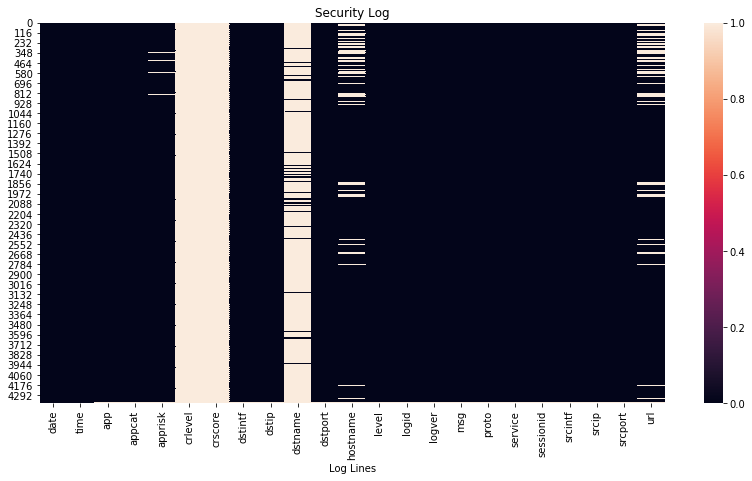

In [0]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Security Log")

# Heatmap showing 
sns.heatmap(data=df1.isnull(), annot=False)

# Add label for horizontal axis
plt.xlabel("Log Lines")

In [0]:
df2_suspect = df1.dropna(subset=["crlevel","crscore"], axis=0)
df2_suspect

,date,time,app,appcat,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,hostname,level,logid,logver,msg,proto,service,sessionid,srcintf,srcip,srcport,url
1913,2019-07-10,13:36:18,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,145898,wifi-vodafone,192.168.53.2,54117,NaN
4140,2019-07-09,22:51:11,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,128249,wifi-vodafone,192.168.53.2,53597,NaN
4245,2019-07-09,21:32:53,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,126635,wifi-vodafone,192.168.53.2,53539,NaN


In [0]:
df2_suspect.sort_values(by=["date","time"], inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df2_suspect

,date,time,app,appcat,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,hostname,level,logid,logver,msg,proto,service,sessionid,srcintf,srcip,srcport,url
4245,2019-07-09,21:32:53,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,126635,wifi-vodafone,192.168.53.2,53539,NaN
4140,2019-07-09,22:51:11,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,128249,wifi-vodafone,192.168.53.2,53597,NaN
1913,2019-07-10,13:36:18,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,145898,wifi-vodafone,192.168.53.2,54117,NaN


Imputation of missing values (for example:  'crlevel', 'crscore')

In [0]:
for col in ["crlevel","crscore","dstname"]:
  print(col,df1[col].dropna().unique(),len(df1[col].dropna().unique()))

crlevel ['low'] 1
crscore ['5'] 1
dstname ['mil04s27-in-f3.1e100.net' 'mil04s29-in-f195.1e100.net'
 'mil04s26-in-f99.1e100.net' 'mil04s26-in-f110.1e100.net'
 'mil04s04-in-f14.1e100.net' 'mil04s25-in-f3.1e100.net'
 'mil04s28-in-f162.1e100.net' 'mil04s29-in-f4.1e100.net' '93.184.220.29'
 'mil04s04-in-f35.1e100.net' 'mil04s27-in-f14.1e100.net'
 'mil04s27-in-f10.1e100.net' 'mil04s29-in-f206.1e100.net'
 'mil04s27-in-f4.1e100.net' 'mil04s26-in-f10.1e100.net'
 'mil04s26-in-f104.1e100.net' '13.107.4.50' 'mil04s03-in-f3.1e100.net'
 'mil04s28-in-f4.1e100.net' 'mil04s03-in-f14.1e100.net'
 'mil04s28-in-f14.1e100.net'
 'a104-83-88-10.deploy.static.akamaitechnologies.com'
 'ocsp.sc.intesasanpaolo.infocert.it' 'ws19414012241.fujitsu.es'
 '37.157.4.24' 'mil04s25-in-f78.1e100.net'
 'a95-101-180-177.deploy.static.akamaitechnologies.com'
 'defra3-vip-bx-008.aaplimg.com'
 'a88-221-111-48.deploy.static.akamaitechnologies.com' '83.224.68.148'
 'a95-101-180-176.deploy.static.akamaitechnologies.com' '83.224.6

In [0]:
for col in ["crlevel","crscore","dstname"]:
  print(col,df1[col].value_counts())

crlevel low    3
Name: crlevel, dtype: int64
crscore 5    3
Name: crscore, dtype: int64
dstname a104-83-88-10.deploy.static.akamaitechnologies.com      38
mil04s27-in-f14.1e100.net                               20
mil04s29-in-f195.1e100.net                              19
mil04s26-in-f110.1e100.net                              17
mil04s03-in-f14.1e100.net                               17
mil04s04-in-f14.1e100.net                               14
mil04s26-in-f99.1e100.net                               12
mil04s04-in-f46.1e100.net                               11
mil04s29-in-f206.1e100.net                              10
mil04s27-in-f4.1e100.net                                 9
mil04s26-in-f10.1e100.net                                9
defra3-vip-bx-001.aaplimg.com                            9
mil04s04-in-f35.1e100.net                                8
mil04s28-in-f174.1e100.net                               8
93.184.220.29                                            8
mil04s25-in-f4.1e10

Extract occurrences for the following columns:
- destip
- sessionid
- app
- srcip
- service
- hostname

In [0]:
for col in ["dstip","sessionid","app","srcip","service","hostname"]:
  print(col,df1[col].value_counts())

dstip 192.168.1.203      331
79.7.90.141        272
156.54.131.85      183
17.253.54.125      110
104.83.88.10        88
40.67.252.61        81
213.227.153.240     56
17.242.57.246       51
104.244.39.20       48
52.0.253.129        46
69.173.144.140      40
185.86.139.59       36
199.166.0.26        34
104.244.37.20       32
213.227.153.241     32
156.54.132.90       30
17.142.171.9        26
2.20.158.32         26
2.20.157.55         26
216.58.198.46       25
31.13.86.4          24
216.58.205.110      24
157.240.193.63      24
37.10.0.96          24
35.170.0.145        24
216.58.205.202      23
216.58.205.142      23
216.58.205.138      22
35.190.26.106       22
216.58.205.106      22
                  ... 
52.74.136.232        2
216.58.205.214       2
172.217.161.35       1
40.90.23.218         1
74.125.111.156       1
172.217.4.195        1
208.91.112.52        1
173.194.60.170       1
172.217.10.131       1
143.204.15.100       1
173.194.190.103      1
40.90.23.211         1
40.80

In [0]:
df1.index


RangeIndex(start=0, stop=4385, step=1)

Plot the different occurences

In [0]:
df1.columns

Index(['date', 'time', 'app', 'appcat', 'apprisk', 'crlevel', 'crscore',
       'dstintf', 'dstip', 'dstname', 'dstport', 'hostname', 'level', 'logid',
       'logver', 'msg', 'proto', 'service', 'sessionid', 'srcintf', 'srcip',
       'srcport', 'url'],
      dtype='object')

In [0]:

df1.values

array([['2019-07-10', '23:28:18', 'SSL_TLSv1.2', ..., '192.168.52.2',
        '60599', '/'],
       ['2019-07-10', '23:28:18', 'SSL', ..., '192.168.52.2', '60599',
        '/'],
       ['2019-07-10', '23:23:15', 'NTP', ..., '192.168.52.2', '55484',
        nan],
       ...,
       ['2019-07-09', '20:14:23', 'SSL', ..., '192.168.53.2', '49674',
        '/'],
       ['2019-07-09', '20:14:23', 'IMAPS', ..., '192.168.53.2', '53166',
        '/'],
       ['2019-07-09', '20:14:23', nan, ..., nan, nan, nan]], dtype=object)

In [0]:
df1[["dstip"]]

,dstip
0,17.248.146.168
1,17.248.146.168
2,17.253.54.125
3,17.248.146.168
4,17.248.146.168
5,17.248.146.168
6,79.7.90.137
7,79.7.90.137
8,192.168.1.203
9,79.7.90.137


In [0]:
 df1.iloc[3]

date                        2019-07-10
time                          23:21:15
app                             iCloud
appcat                  Storage.Backup
apprisk                         medium
crlevel                            NaN
crscore                            NaN
dstintf                           wifi
dstip                   17.248.146.168
dstname                            NaN
dstport                            443
hostname            gateway.icloud.com
level                      information
logid                            28704
logver                              52
msg          "Storage.Backup: iCloud,"
proto                                6
service                          HTTPS
sessionid                       164786
srcintf                           wan1
srcip                     192.168.52.2
srcport                          60598
url                                  /
Name: 3, dtype: object

In [0]:
# transform the dataframe in an matrix of 2 columns: dstip and the count of the dstip
#df3={'dstip' : df1["dstip"], 'dstip_count' : df1["dstip"].value_counts()}
df3={'dstip_count' : df1["dstip"].value_counts()}
df4 = pd.DataFrame(df3)[:20]
df4


,dstip_count
192.168.1.203,331
79.7.90.141,272
156.54.131.85,183
17.253.54.125,110
104.83.88.10,88
40.67.252.61,81
213.227.153.240,56
17.242.57.246,51
104.244.39.20,48
52.0.253.129,46


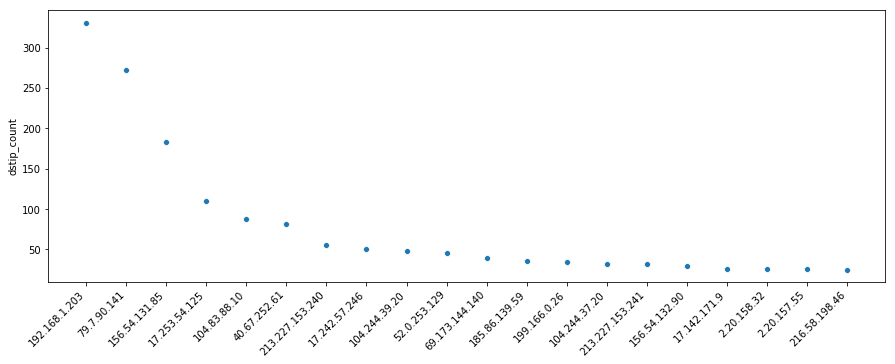

In [0]:
x4=df4.index
y4=df4["dstip_count"]
plt.figure(figsize=(15,5))
chart = sns.scatterplot(x4, y4)
#chart = sns.countplot(
#    data=data[data['Year'] == 1980],
#    x='Sport',
#    palette='Set1'
#)
#chart
#chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
#chart.set_xticklabels('ddd',rotation=45,horizontalalignment='right')
#chart.get_xticklabels()
plt.xticks(rotation=45,horizontalalignment='right');

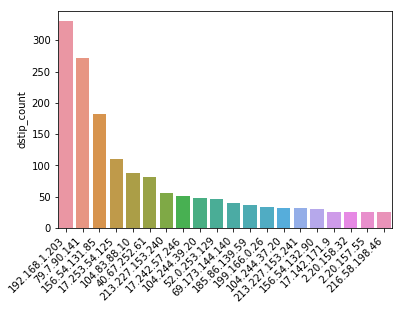

In [0]:
chart = sns.barplot(x4, y4)
plt.xticks(rotation=45,horizontalalignment='right');

In [0]:
# transform the dataframe in an matrix of 2 columns: dstip and the count of the dstip
df5={'app_count' : df1["app"].value_counts()}
df6 = pd.DataFrame(df5)[:10]
df6


,app_count
SSL,1640
SSL_TLSv1.2,1609
SNMP_GetRequest,251
NTP,110
iCloud,78
SNMP_V1,72
YouTube,69
Facebook,55
Microsoft.Portal,51
Viber,50


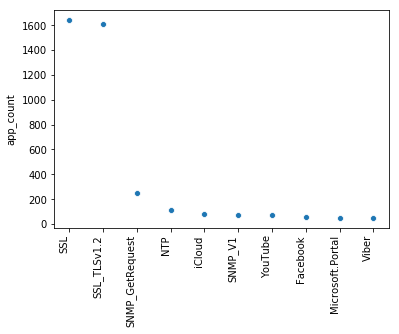

In [0]:
sns.scatterplot(x=df6.index, y=df6["app_count"])
plt.xticks(rotation=90,horizontalalignment='right');

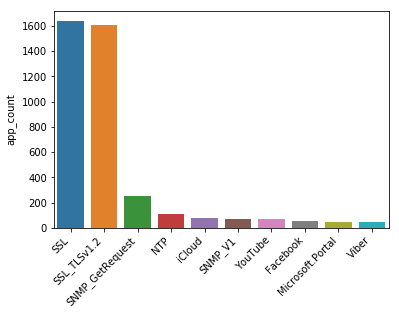

In [0]:
chart = sns.barplot(x=df6.index, y=df6["app_count"])
plt.xticks(rotation=45,horizontalalignment='right');

Extract occurrences for the following columns:

time slot (4; 0-6, 7-12, 13-18, 19-24) on "time" columns

for each time sloc compute la frequency of the single service

  x: time slot
  
  y: frequency
  
  color (label): service

In [0]:
#df['time'] = pd.to_timedelta(df['time'],unit='s')
df['time'] = pd.to_datetime(df['time'])
df['hours'] = df['time'].dt.hour
#data=df.groupby([pd.Grouper(key='time',freq='H'),'app'])['app'].agg({'freq':'count'}).reset_index()
data=df.groupby(['hours','app'])['app'].agg({'freq':'count'}).reset_index()
#data=data.pivot(index='time',columns='app',values='freq').fillna(0)
data=data.pivot(index='hours',columns='app',values='freq').fillna(0)
data.head()
#df['hours'].unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


app,Apple.Ipad,Apple.Iphone,Apple.Store,Apple.iOS.Push.Notification,BitTorrent,Facebook,Facebook_Video.Play,Google.Accounts,Google.Ads,Google.Analytics,Google.Calendar,Google.Drive,Google.Services,HTTP.Audio,HTTP.Download.Accelerator,HTTP.Segmented.Download,IMAPS,Instagram,MS.Windows.Update,Microsoft.Authentication,Microsoft.Office.Online,Microsoft.Portal,NTP,OCSP,Ping,SNMP_GetNextRequest,SNMP_GetRequest,SNMP_V1,SSL,SSL_SSLv3,SSL_TLSv1.0,SSL_TLSv1.2,Skype,Spotify,Twitter,Viber,Vkontakte,WhatsApp,YouTube,iCloud
hours,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,44.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
3,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [0]:
highest_freq_app=data.sum().sort_values(ascending=False).apply(lambda x: x if x>200 else np.nan).dropna().index

Text(0.5, 0, 'Hours')

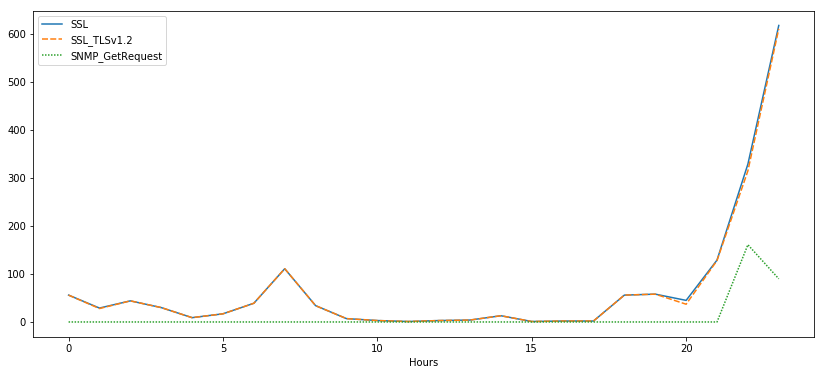

In [0]:
plt.figure(figsize=(14,6))
# at present we cannot insert more than 6 columns because we don't have enough styles (colors)
sns.lineplot(data=data.loc[:,highest_freq_app])
#sns.lineplot(data=data.iloc[:,:6])
plt.xlabel("Hours")
#plt.xticks(pd.to_datetime(data.index))

In [0]:
# import all the file of the TLOG in single dataframe

#The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order
import glob

# set the path, filename, temporary array and a dictionary 
path = "/content"
filenames = glob.glob(path + "/FWF40C3915001580.tlog.*.gz")
dfts = []
cols_dict=dict()


for sec_filepat in filenames:
  # read the cvs into dataframe
  df=pd.read_csv(sec_filepat, sep=',', header=None, compression='gzip')
  # add the column "filepath" to dataframe
  df["filepath"]="filepath="+sec_filepat
  # create a dictionary using "sec_filepath" as key and <number of columns>,<list_of_columns> as values
  cols_dict[sec_filepat]=(len(df.columns), [df[col].apply(lambda x: cut_string(x, char='=', pos=0)).dropna().unique()[0] for col in df.columns])
  # append each dataframe to the temporary dataframe
  dfts.append(df)

# Concatenate pandas objects along a particular axis with optional set logic along the other axes.
# ignore_index = True: do not use the index values along the concatenation axis. The resulting axis will be labeled 0, …, n - 1.
dft = pd.concat(dfts, ignore_index=True)
# assegna i nomi alle colonne ricavandone i nomi dalla prima riga
# ?? come vanno ad essere ordinate dalla riga più numerosa a quella meno ???
dft.columns = [dft[col].apply(lambda x: cut_string(x, char='=', pos=0)).dropna().unique()[0] for col in dft.columns]
dft = dft.applymap(lambda x: cut_string(x, char='=', pos=1))

cols_dict

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the c

{'/content/FWF40C3915001580.tlog.1557032500.log.csv.gz': (58,
  ['itime',
   'date',
   'time',
   'devid',
   'vd',
   'type',
   'subtype',
   'action',
   'app',
   'appact',
   'appcat',
   'appid',
   'applist',
   'apprisk',
   'countapp',
   'craction',
   'crlevel',
   'crscore',
   'devname',
   'devtype',
   'dstcountry',
   'dstintf',
   'dstip',
   'dstport',
   'duration',
   'eventtype',
   'hostname',
   'level',
   'logid',
   'logver',
   'mastersrcmac',
   'msg',
   'osname',
   'osversion',
   'policyid',
   'poluuid',
   'proto',
   'rcvdbyte',
   'rcvdpkt',
   'reqtype',
   'sentbyte',
   'sentpkt',
   'service',
   'sessionid',
   'srccountry',
   'srcintf',
   'srcip',
   'srcmac',
   'srcname',
   'srcport',
   'srcssid',
   'trandisp',
   'transip',
   'transport',
   'url',
   'user',
   'utmaction',
   'filepath']),
 '/content/FWF40C3915001580.tlog.1557637233.log.csv.gz': (59,
  ['itime',
   'date',
   'time',
   'devid',
   'vd',
   'type',
   'subtype',
   

In [0]:
cols_dict2={key:value[1] for key,value in cols_dict.items()}
cols_dict2

cols_list=[]
for cols in cols_dict2.values():
  cols_list+=cols
df_revel=pd.DataFrame(index=list(cols_dict2.keys()),columns=list(set(cols_list)))

for key,values in cols_dict2.items():
  for value in values:
    df_revel.loc[key,value]=1
    
df_revel.fillna(0, inplace=True)

df_revel

,subtype,dstintf,sessionid,transip,devname,dstcountry,filepath,utmaction,srcip,osname,srcssid,eventtype,date,srcintf,crlevel,logid,poluuid,transport,logver,rcvdpkt,type,appact,vd,level,policyid,apprisk,countapp,sentbyte,app,appid,trandisp,osversion,srcname,appcat,service,dstssid,crscore,time,url,sentpkt,duration,proto,msg,itime,srcport,devid,hostname,mastersrcmac,srcmac,craction,action,dstport,user,rcvdbyte,devtype,reqtype,dstip,srccountry,applist
/content/FWF40C3915001580.tlog.1558847073.log.csv.gz,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
/content/FWF40C3915001580.tlog.1561870938.log.csv.gz,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
/content/FWF40C3915001580.tlog.1557032500.log.csv.gz,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
/content/FWF40C3915001580.tlog.1560056530.log.csv.gz,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
/content/FWF40C3915001580.tlog.log.csv.gz,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
/content/FWF40C3915001580.tlog.1558242022.log.csv.gz,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
/content/FWF40C3915001580.tlog.1563685294.log.csv.gz,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,1
/content/FWF40C3915001580.tlog.1559451612.log.csv.gz,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
/content/FWF40C3915001580.tlog.1561266059.log.csv.gz,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
/content/FWF40C3915001580.tlog.1557637233.log.csv.gz,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Text(0.5, 42.0, 'Log Lines')

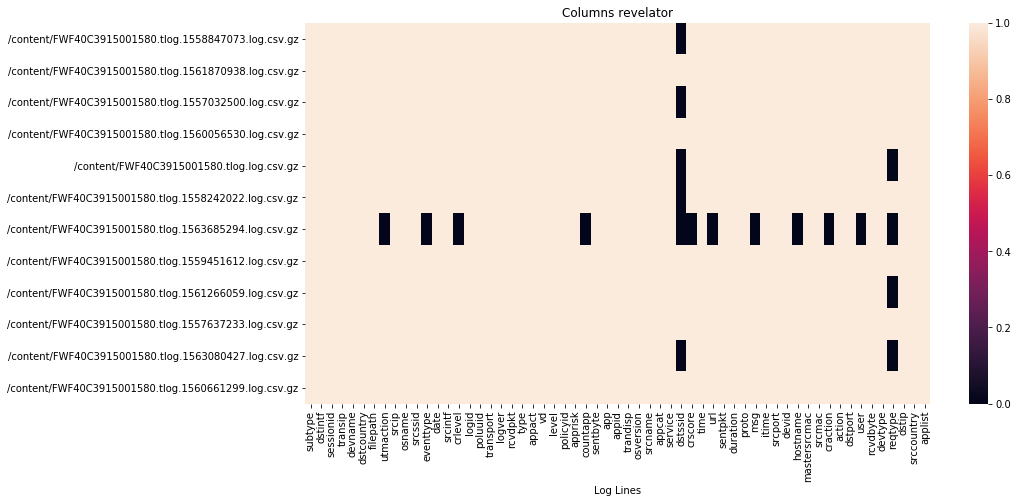

In [0]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Columns revelator")

# Heatmap showing 
sns.heatmap(data=df_revel, annot=False)

# Add label for horizontal axis
plt.xlabel("Log Lines")

In [0]:
print(len(dft))

940642


In [0]:
dft.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940642 entries, 0 to 940641
Data columns (total 59 columns):
itime           940642 non-null object
date            940641 non-null object
time            940641 non-null object
devid           940641 non-null object
vd              940641 non-null object
type            940641 non-null object
subtype         940641 non-null object
action          940641 non-null object
app             873969 non-null object
appact          387322 non-null object
appcat          776258 non-null object
appid           776258 non-null object
applist         832782 non-null object
apprisk         774687 non-null object
countapp        222947 non-null object
craction        42028 non-null object
crlevel         42521 non-null object
crscore         43458 non-null object
devname         940641 non-null object
devtype         457988 non-null object
dstcountry      541557 non-null object
dstintf         940154 non-null object
dstip           940641 non-null ob

In [0]:
dft.columns.tolist()

['itime',
 'date',
 'time',
 'devid',
 'vd',
 'type',
 'subtype',
 'action',
 'app',
 'appact',
 'appcat',
 'appid',
 'applist',
 'apprisk',
 'countapp',
 'craction',
 'crlevel',
 'crscore',
 'devname',
 'devtype',
 'dstcountry',
 'dstintf',
 'dstip',
 'dstport',
 'duration',
 'eventtype',
 'hostname',
 'level',
 'logid',
 'logver',
 'mastersrcmac',
 'msg',
 'osname',
 'osversion',
 'policyid',
 'poluuid',
 'proto',
 'rcvdbyte',
 'rcvdpkt',
 'reqtype',
 'sentbyte',
 'sentpkt',
 'service',
 'sessionid',
 'srccountry',
 'srcintf',
 'srcip',
 'srcmac',
 'srcname',
 'srcport',
 'srcssid',
 'trandisp',
 'transip',
 'transport',
 'url',
 'user',
 'utmaction',
 'filepath',
 'utmaction']

In [0]:
dft.loc[[9,16]]


,itime,date,time,devid,vd,type,subtype,action,app,appact,appcat,appid,applist,apprisk,countapp,craction,crlevel,crscore,devname,devtype,dstcountry,dstintf,dstip,dstport,duration,eventtype,hostname,level,logid,logver,mastersrcmac,msg,osname,osversion,policyid,poluuid,proto,rcvdbyte,rcvdpkt,reqtype,sentbyte,sentpkt,service,sessionid,srccountry,srcintf,srcip,srcmac,srcname,srcport,srcssid,trandisp,transip,transport,url,user,utmaction,filepath,utmaction
9,1558847253,2019-05-26,07:07:30,FWF40C3915001580,root,traffic,forward,accept,"""DNS""",detected,"""Network.Service""",16195,"""default""","""elevated""",NaN,NaN,NaN,NaN,massimilianop,"""iPhone""","""Canada""","""wan1""",208.91.112.53,53,180,NaN,NaN,notice,13,52,90:e1:7b:6d:c9:30,NaN,"""iPhone""","""iOS""",5,41ade0fe-56eb-51e8-5c32-4baec42e8484,17,126,1,NaN,60,1,DNS,10123,"""Reserved""","""wifi-vodafone""",192.168.53.5,90:e1:7b:6d:c9:30,iPhone-Anna,63180,"""Vodafone-33654203""",snat,192.168.50.254,63180,NaN,NaN,NaN,/content/FWF40C3915001580.tlog.1558847073.log....,NaN
16,1558847464,2019-05-26,07:11:02,FWF40C3915001580,root,utm,app-ctrl,pass,"""NTP""",NaN,"""Network.Service""",16270,"""default""",elevated,NaN,NaN,NaN,NaN,massimilianop,NaN,NaN,"""wan1""",17.253.54.125,123,NaN,app-ctrl-all,NaN,information,28704,52,NaN,"""Network.Service: NTP,""",NaN,NaN,5,NaN,17,NaN,NaN,NaN,NaN,NaN,"""NTP""",10161,NaN,"""wifi-vodafone""",192.168.53.5,NaN,NaN,64090,NaN,NaN,NaN,NaN,NaN,"""",NaN,/content/FWF40C3915001580.tlog.1558847073.log....,NaN


In [0]:
dft.describe()

,itime,date,time,devid,vd,type,subtype,action,app,appact,appcat,appid,applist,apprisk,countapp,craction,crlevel,crscore,devname,devtype,dstcountry,dstintf,dstip,dstport,duration,eventtype,hostname,level,logid,logver,mastersrcmac,msg,osname,osversion,policyid,poluuid,proto,rcvdbyte,rcvdpkt,reqtype,sentbyte,sentpkt,service,sessionid,srccountry,srcintf,srcip,srcmac,srcname,srcport,srcssid,trandisp,transip,transport,url,user,utmaction,filepath,utmaction
count,940642,940641,940641,940641,940641,940641,940641,940641,873969,387322,776258,776258,832782,774687,222947,42028,42521,43458,940641,457988,541557,940154,940641,937639,226489,491342,371420,594761,940640,940641,739837,432322,414902,448846,649840,737753,656130,774093,532087,343354,260834,569920,728278,911412,774227,732116,905056,708537,491628,646502,717785,487731,498338,425030,405881,360949,296273,940642,115895
unique,241740,76,82368,1,1,2,4,8,117,1,14,104,1,8,44,4,4,4,3,10,40,7,8025,375,2137,2434,2621,3387,9,7,13,102,99,18,18,12,8,41940,53120,12722,26373,30164,53198,168844,213542,22,25,27,20539,36029,40756,5,15088,27299,25958,1232,2,12,1
top,1562570745,2019-06-03,22:20:38,FWF40C3915001580,root,traffic,forward,pass,"""SSL_TLSv1.2""",detected,"""Network.Service""",41540,"""default""","""elevated""",2,262144,low,5,massimilianop,"""iPhone""","""Canada""","""wan1""",208.91.112.53,443,180,app-ctrl-all,app-ctrl-all,notice,notice,52,52,90:e1:7b:6d:c9:30,"""iPhone""","""iOS""",5,5,6,6,1,1,1,1,"""HTTPS""","""HTTPS""","""Reserved""","""Reserved""","""wifi-vodafone""",192.168.53.5,90:e1:7b:6d:c9:30,iPhone,"""Vodafone-33654203""",snat,snat,192.168.50.254,"""/""","""/""","""",/content/FWF40C3915001580.tlog.1559451612.log....,allow
freq,396,34102,148,940641,940641,551218,453507,388936,233593,387322,586838,233593,832782,246853,112017,40617,41560,42497,940636,229090,224251,772007,180416,558575,80259,166327,222609,222865,319174,393062,547574,84521,99181,147145,236936,299799,266727,372315,84080,113982,21546,80344,137413,174561,206508,284951,224561,122571,76597,63529,121062,170884,235265,235265,144259,180153,203442,130322,115895


Text(0.5, 42.0, 'Log Lines')

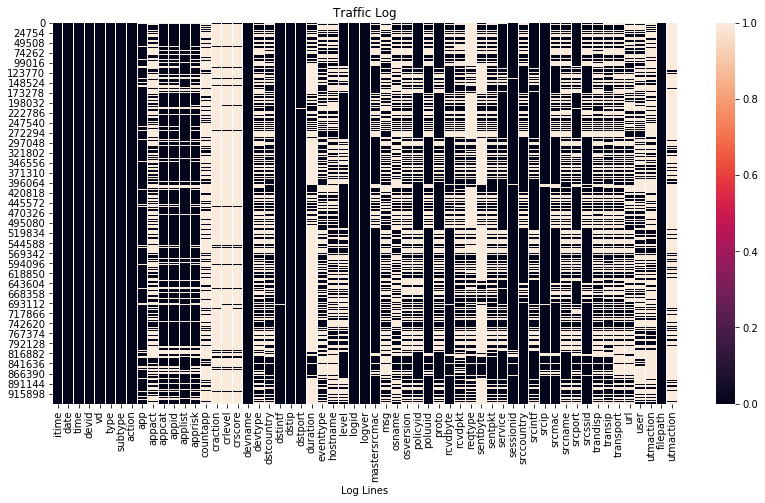

In [0]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Traffic Log")

# Heatmap showing 
sns.heatmap(data=dft.isnull(), annot=False)

# Add label for horizontal axis
plt.xlabel("Log Lines")

In [0]:
dft.sort_values(["itime","sessionid"],inplace=True)

In [0]:
dft.isnull()

,itime,date,time,devid,vd,type,subtype,action,app,appact,appcat,appid,applist,apprisk,countapp,craction,crlevel,crscore,devname,devtype,dstcountry,dstintf,dstip,dstport,duration,eventtype,hostname,level,logid,logver,mastersrcmac,msg,osname,osversion,policyid,poluuid,proto,rcvdbyte,rcvdpkt,reqtype,sentbyte,sentpkt,service,sessionid,srccountry,srcintf,srcip,srcmac,srcname,srcport,srcssid,trandisp,transip,transport,url,user,utmaction,filepath,utmaction
318954,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
175388,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,True,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,False,True,False,True,True,True,True,True,False,False,True,False,False,True,True,False,True,True,True,True,False,False,True,False,True
175389,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,True,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,False,True,False,True,True,True,True,True,False,False,True,False,False,True,True,False,True,True,True,True,False,False,True,False,True
175390,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True
175394,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,False,False,False,False,False,True,True,False,False,False,True,True,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,True,False,True,True,True,True,True,False,True
175391,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,False,False,False,False,False,True,True,False,False,False,True,True,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,True,False,True,True,True,True,True,False,True
175395,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,False,False,False,False,False,True,True,False,False,False,True,True,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,True,False,True,True,True,True,True,False,True
175392,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,True,False,True,True,False,False,False,True,False,True,False,False,False,True,False,True,True,False,True,False,True,True,True,True,True,False,False,True,False,False,True,True,False,True,True,True,True,True,False,True,False,True
175393,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,True,False,True,True,False,False,False,True,False,True,False,False,False,True,False,True,True,False,True,False,True,True,True,True,True,False,False,True,False,False,True,True,False,True,True,True,True,True,False,True,False,True
175396,False,False,False,False,False,False,False,False,True,True,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True


Text(0.5, 42.0, 'Log Lines')

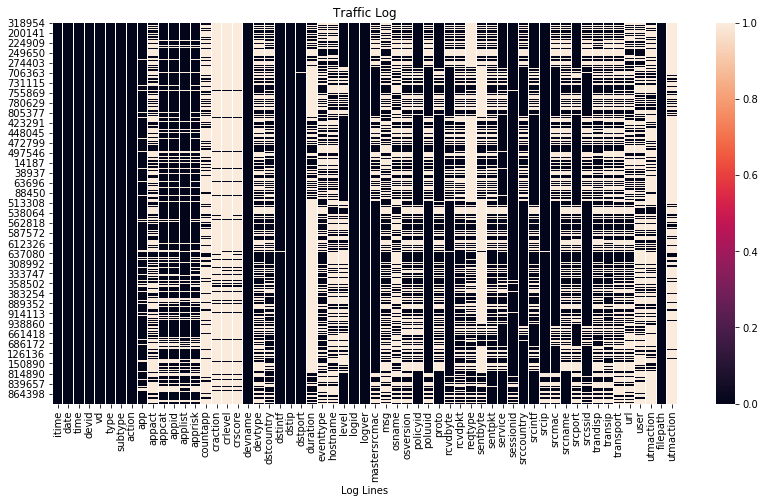

In [0]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Traffic Log")

# Heatmap showing 
sns.heatmap(data=dft.isnull(), annot=False)

# Add label for horizontal axis
plt.xlabel("Log Lines")

In [0]:
dft.loc[dft["date"].isnull()]

,itime,date,time,devid,vd,type,subtype,action,app,appact,appcat,appid,applist,apprisk,countapp,craction,crlevel,crscore,devname,devtype,dstcountry,dstintf,dstip,dstport,duration,eventtype,hostname,level,logid,logver,mastersrcmac,msg,osname,osversion,policyid,poluuid,proto,rcvdbyte,rcvdpkt,reqtype,sentbyte,sentpkt,service,sessionid,srccountry,srcintf,srcip,srcmac,srcname,srcport,srcssid,trandisp,transip,transport,url,user,utmaction,filepath,utmaction
318954,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/FWF40C3915001580.tlog.1560056530.log....,NaN


In [0]:
dft.drop(dft.loc[dft["date"].isnull()].index,axis=0,inplace=True)
dft.reset_index(inplace=True)
len(dft)

940641

In [0]:
for col in dft.columns:
  tmp=dft[col].isnull().sum()/len(dft)*100
  print(col,tmp)

index 0.0
itime 0.0
date 0.0
time 0.0
devid 0.0
vd 0.0
type 0.0
subtype 0.0
action 0.0
app 7.087932590648292
appact 58.82361070801719
appcat 17.475636294824486
appid 17.475636294824486
applist 11.46654249602133
apprisk 17.64265006522148
countapp 76.29839651896951
craction 95.5319829775653
crlevel 95.47957190894294
crscore 95.37995898541527
devname 0.0
devtype 51.31107404418902
dstcountry 42.42681320503784
dstintf 0.05177320571822831
dstip 0.0
dstport 0.31914407303105014
duration 75.92184478456711
eventtype 47.76519416015249
hostname 60.51416002491917
level 36.77067021318442
logid 0.0001063104840210027
logver 0.0
mastersrcmac 21.34757043335343
msg 54.039638927072076
osname 55.89156755871794
osversion 52.28296448910902
policyid 30.915195063791607
poluuid 21.5691214820532
proto 30.2465021192995
rcvdbyte 17.705798492729958
rcvdpkt 43.43357348871674
reqtype 63.497870069452645
sentbyte 72.27061121086578
sentpkt 39.41152894675014
service 22.5764133181522
sessionid 3.1073491374498876
srccountr